<a href="https://colab.research.google.com/github/Kate028/100-days-of-code/blob/main/Customer_Ad_Clicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load your dataset
df = pd.read_csv('advertising.csv')

# Summary statistics
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [ ]:
df.drop('Ad Topic Line', axis = 1, inplace = True)
df.drop('Country', axis = 1, inplace = True)
df.drop('City', axis = 1, inplace = True)
df.drop('Timestamp', axis = 1, inplace = True)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [ ]:
y = df['Clicked on Ad']  #store the value in y - target variables

In [ ]:
df.drop('Clicked on Ad', axis = 1, inplace = True)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [ ]:
x = df # input variable

In [ ]:
# for training
from sklearn.model_selection import train_test_split

In [ ]:
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)  #80-20 ratio of splitting data for training and testing

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()

In [ ]:
lm.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lm.score(x_test, y_test)

0.905

In [ ]:
import matplotlib.pyplot as plt

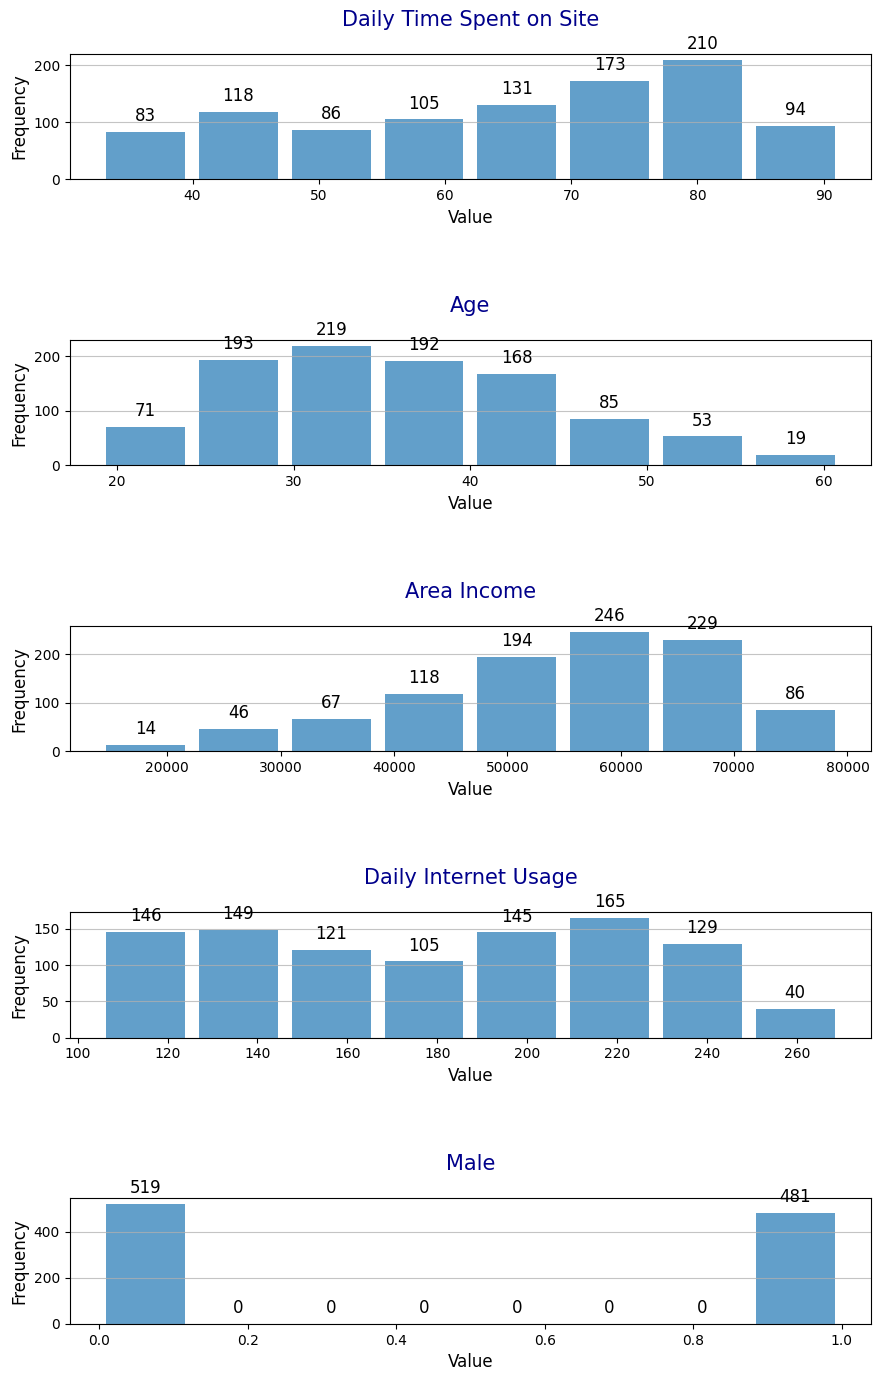

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histograms for each column in df
fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 15))  # Creating subplots for each column

for i, column in enumerate(df.columns):
    ax = axes[i]  # Selecting the subplot axis
    n, bins, patches = ax.hist(df[column], bins=8, color='#1F77B4', alpha=0.7, rwidth=0.85)
    ax.set_title(f'{column}', fontsize=15, pad=20, color='darkblue')

    # Adding value labels to each bar
    for patch in patches:
        height = patch.get_height()  # Getting the height of each bar
        ax.annotate(f'{int(height)}',
                    xy=(patch.get_x() + patch.get_width() / 2, height),  # Positioning the label
                    xytext=(0, 5),  # Adding a slight vertical offset
                    textcoords='offset points',  # Offset in points
                    ha='center', va='bottom', fontsize=12)  # Center the text

    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(axis='y', alpha=0.75)

plt.tight_layout(pad=5)  # Adjust the spacing between plots
plt.show()
